## k-Nearest Neighbors
This algorithm is very simple to implement. Note that it takes nothing to train the model, you just need to save the data. When given a new data point, you need to calculate the distance of that data point to every existing data point and find the *k* closest ones.

### Data

You can also use sklearn's `make_classification` for creating a fake dataset.

```python
X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=5, random_state=5)
```

## kNN Implementation

**Include all your code for this section in** `KNearestNeighbors.py`.

Here's the pseudocode for using k Nearest Neighbors to predict the class of a point `x`:

```
kNN:
    for every point in the dataset:
        calculate the distance between the point and x
    take the k points with the smallest distances to x (**hint: use numpy's argsort() function**)
    return the majority class among these items
```

1. Implement the function `euclidean_distance` which computes the Euclidean distance between two numpy arrays.

2. Implement the class `KNearestNeighbors`. We are going to write our code similar to how sklearn does. You should be able to run your code like this:

    ```python
    knn = KNearestNeighbors(k=3, distance=euclidean_distance)
    knn.fit(X, y)
    y_predict = knn.predict(X_new)
    ```

    Here `X` is the feature matrix as a 2d numpy array, `y` is the labels as a numpy array. 3 is the *k* and `euclidean_distance` is the distance function. `predict` will return a numpy array of the predicted labels.

    You will need to implement a `KNearestNeighbors` class with three methods: `fit`, `predict` and `score` (calculates accuracy).

3. Implement the function `cosine_distance` which computes a cosine-similarity-based distance between two numpy arrays. Specifically, use this formula:

    ![cosine distance](images/cosine.png)

4. Plot the decision boundary. Look at this [sklearn example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py). Note that you'll need exactly 2 continuous features in order to do this.

5. Test your algorithm on a dataset used for a previous exercise. Use [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute the accuracy, precision and recall of your model. Use KFold Cross Validation and determine the best choice of `k` (will probably depend on which metric you use!).


## Extra Credit

Practice with [recursion](https://github.com/gschool/dsi-welcome/tree/master/readings/recursion).

In [1]:
# COLLAPSE CELL
# PMsearch np.v*
#x = data['mass']
#x?

# from jupyterthemes import jtplot
# jtplot.style(theme='solarized')
# from jupyterlab_table import JSONTable
# JSONTable(df)

# from IPython.display import HTML, display

# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 1000})

import better_exceptions
better_exceptions.MAX_LENGTH = None

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from pprint import pprint
import math
import statsmodels.stats as sms
import statsmodels.api as sm
import statsmodels.regression as smr
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# 04atplotlib inline
# %load_ext heat

plt.ion()
# plt.ioff()

# %heat

import os 
# dir_path = os.path.dirname(os.path.realpath(__file__))
cwd = os.getcwd()

# fig, ax = plt.subplots()
# ax.plot(x, y)

/Users/tomwong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_features=4, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=5, random_state=5)


In [103]:
pprint(y)
pprint(X[95:,])

array([1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0])
array([[-1.2515569 ,  0.62815841],
       [-0.8832003 ,  0.19519895],
       [-1.51361789,  0.16348362],
       [-0.77230204, -0.06527799],
       [-1.12983001, -1.00670594]])


In [90]:
# old euclid
def euclid(newX, X):
   distances = []
   for row, value in enumerate(X):
       distances.append(np.linalg.norm(newX-value))
   return(distances)

#         np.linalg.norm(newX-X[0])



In [106]:
def euclidean_distance(array1,array2):
    return np.linalg.norm(array1-array2)
def cosine_distance(array1, array2):
    return (1 - (np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))))

In [110]:

np.dot(newX,X)

ValueError: shapes (4,) and (100,2) not aligned: 4 (dim 0) != 100 (dim 0)

In [79]:
# old code - testing argsort
a = [4, 3, 2, 1]
for i in np.argsort(euclid(newX, X)):
    print(euclid(newX, X)[i])
print [a[i] for i in np.argsort(a)]

1.8152287773808549
1.9408995513124474
1.9458193564414632
1.9563959883368138
2.035549594707053
2.110787816121782
2.1323120155620088
2.1492149744810254
2.1592113706272635
2.214118497387465
2.3044684873150696
2.304513172572567
2.321232798873976
2.349970815618789
2.362695267810404
2.3801043678665437
2.4039499077011945
2.449263498294931
2.450269343661928
2.455640501171082
2.4623827552791857
2.502038451810142
2.551639083620694
2.5864140858881726
2.6024703624051364
2.6056369427700026
2.6291830206319795
2.6679919723256655
2.7195446917288697
2.7390574862100565
2.7694106288029454
2.79311129152168
2.8029788080709723
2.8894695171611624
2.8956491506372424
2.9887792978934886
2.988809029541001
3.052756189408496
3.066027673218236
3.10544011643194
3.216128186205029
3.306283488438843
3.3091583989941484
3.3134384585413366
3.3395575989491166
3.3865768968664876
3.4496464404146625
3.4637669138286284
3.5014505736995774
3.921421374995524
6.120394469552799
6.628195249833534
6.925067650189494
7.063680428853165


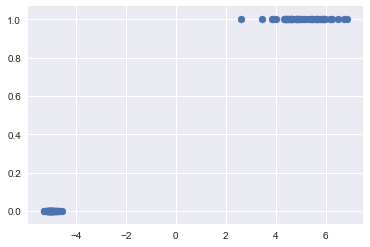

In [23]:

plt.scatter(X[:,0],y, label="1")
# plt.scatter(X[:,1],y, label="2")
# plt.scatter(X[:,2],y, label="3")
# plt.scatter(X[:,3],y, label="4")

In [ ]:
'''
Here's the pseudocode for using k Nearest Neighbors to predict the class of a point x:
    kNN:
    for every point in the dataset:
        calculate the distance between the point and x
    take the k points with the smallest distances to x (**hint: use numpy's argsort() function**)
    return the majority class among these items
'''

# class kNN(object):
# knn = KNearestNeighbors(k=3, distance=euclidean_distance)
# knn.fit(X, y)
# y_predict = knn.predict(X_new)

In [ ]:
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

class kNN(object):
    def __init__(self, k, distance):
        self.k = k
        self.distance = distance
    def fit():
        pass
    def predict():
        pass
    def score():
        pass

(100,)
Accuracy: 0.95
	actual	predict	correct?
0	1	1	1
1	2	2	1
2	0	0	1
3	1	1	1
4	2	2	1
5	1	1	1
6	0	0	1
7	1	1	1
8	2	2	1
9	1	1	1
10	1	1	1
11	2	2	1
12	2	2	1
13	2	2	1
14	0	0	1
15	1	1	1
16	0	0	1
17	1	1	1
18	1	1	1
19	1	1	1
20	2	2	1
21	2	2	1
22	0	0	1
23	1	1	1
24	1	1	1
25	2	2	1
26	1	1	1
27	0	0	1
28	2	2	1
29	0	0	1
30	2	2	1
31	2	2	1
32	2	1	0
33	0	0	1
34	0	0	1
35	1	1	1
36	0	0	1
37	0	0	1
38	1	1	1
39	0	0	1
40	2	2	1
41	0	0	1
42	1	1	1
43	2	2	1
44	0	0	1
45	0	0	1
46	2	2	1
47	1	1	1
48	2	2	1
49	1	1	1
50	1	1	1
51	2	2	1
52	0	0	1
53	2	2	1
54	1	1	1
55	0	0	1
56	1	1	1
57	2	2	1
58	0	0	1
59	1	1	1
60	2	2	1
61	1	1	1
62	0	0	1
63	1	1	1
64	0	0	1
65	2	2	1
66	2	2	1
67	0	0	1
68	0	0	1
69	0	0	1
70	0	0	1
71	0	0	1
72	2	2	1
73	2	2	1
74	1	1	1
75	1	1	1
76	0	0	1
77	0	2	0
78	1	1	1
79	0	2	0
80	2	2	1
81	1	1	1
82	0	0	1
83	0	2	0
84	1	1	1
85	1	1	1
86	1	1	1
87	1	1	1
88	2	2	1
89	2	2	1
90	0	0	1
91	2	2	1
92	0	0	1
93	2	2	1
94	2	2	1
95	2	2	1
96	2	2	1
97	2	2	1
98	0	2	0
99	0	0	1


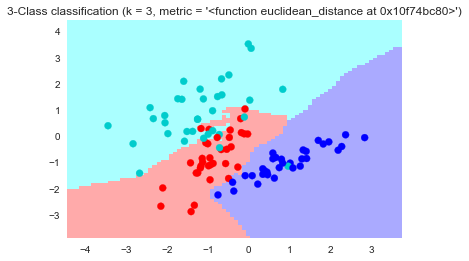

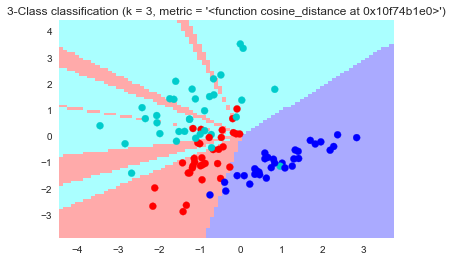

In [111]:
"""
Functions and classes to complete non-parametric-learners individual exercise.

Implementation of kNN algorithm modeled on sci-kit learn functionality.

TODO: Improve '__main__' to allow flexible running of script
    (different ks, different number of classes)
"""

from collections import Counter
from matplotlib.colors import ListedColormap
import sys


def plot_decision_boundary(clf, X, y, n_classes):
    """Plot the decision boundary of a kNN classifier.

    Plots decision boundary for up to 4 classes.

    Colors have been specifically chosen to be color blindness friendly.

    Assumes classifier, clf, has a .predict() method that follows the
    sci-kit learn functionality.

    X must contain only 2 continuous features.

    Function modeled on sci-kit learn example.

    Parameters
    ----------
    clf: instance of classifier object
        A fitted classifier with a .predict() method.
    X: numpy array, shape = [n_samples, n_features]
        Test data.
    y: numpy array, shape = [n_samples,]
        Target labels.
    n_classes: int
        The number of classes in the target labels.
    """
    mesh_step_size = .1

    # Colors are in the order [red, yellow, blue, cyan]
    cmap_light = ListedColormap(['#FFAAAA', '#FFFFAA', '#AAAAFF', '#AAFFFF'])
    cmap_bold = ListedColormap(['#FF0000', '#FFFF00', '#0000FF', '#00CCCC'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    feature_1 = X[:, 0]
    feature_2 = X[:, 1]
    x_min, x_max = feature_1.min() - 1, feature_1.max() + 1
    y_min, y_max = feature_2.min() - 1, feature_2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    dec_boundary = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    dec_boundary = dec_boundary.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, dec_boundary, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(feature_1, feature_2, c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(
              "{0}-Class classification (k = {1}, metric = '{2}')"
              .format(n_classes, clf.k, clf.distance))
    plt.show()


def euclidean_distance(a, b):
    """Compute the euclidean_distance between two numpy arrays.

    Parameters
    ----------
    a: numpy array
    b: numpy array

    Returns
    -------
    numpy array
    """
    return np.sqrt(np.dot(a - b, a - b))


def cosine_distance(a, b):
    """Compute the cosine_distance between two numpy arrays.

    Parameters
    ----------
    a: numpy array
    b: numpy array

    Returns
    -------
    """
    return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))


class KNearestNeighbors(object):
    """Classifier implementing the k-nearest neighbors algorithm.

    Parameters
    ----------
    k: int, optional (default = 5)
        Number of neighbors that get a vote.
    distance: function, optional (default = euclidean)
        The distance function to use when computing distances.
    """

    def __init__(self, k=5, distance=euclidean_distance):
        """Initialize a KNearestNeighbors object."""
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        """Fit the model using X as training data and y as target labels.

        According to kNN algorithm, the training data is simply stored.

        Parameters
        ----------
        X: numpy array, shape = [n_samples, n_features]
            Training data.
        y: numpy array, shape = [n_samples,]
            Target labels.

        Returns
        -------
        None
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Return the predicted labels for the input X test data.

        Assumes shape of X is [n_test_samples, n_features] where n_features
        is the same as the n_features for the input training data.

        Parameters
        ----------
        X: numpy array, shape = [n_samples, n_features]
            Test data.

        Returns
        -------
        result: numpy array, shape = [n_samples,]
            Predicted labels for each test data sample.

        """
        num_train_rows, num_train_cols = self.X_train.shape
        num_X_rows, _ = X.shape
        X = X.reshape((-1, num_train_cols))
        distances = np.zeros((num_X_rows, num_train_rows))
        for i, x in enumerate(X):
            for j, x_train in enumerate(self.X_train):
                distances[i, j] = self.distance(x_train, x)
        # Sort and take top k
        top_k = self.y_train[distances.argsort()[:, :self.k]]
        result = np.zeros(num_X_rows)
        for i, values in enumerate(top_k):
            top_voted_label, _ = Counter(values).most_common(1)[0]
            result[i] = top_voted_label
        return result

    def score(self, X, y_true):
        """Return the mean accuracy on the given data and true labels.

        Parameters
        ----------
        X: numpy array, shape = [n_samples, n_features]
            Test data.
        y_true: numpy array, shape = [n_samples,]
            True labels for given test data, X.

        Returns
        -------
        score: float
            Mean accuracy of self.predict(X) given true labels, y_true.
        """
        y_pred = self.predict(X)
        score = y_true == y_pred
        return np.mean(score)


if __name__ == '__main__':
    X, y = make_classification(n_classes=3, n_features=2, n_redundant=0,
                               n_informative=2, n_clusters_per_class=1,
                               class_sep=1, random_state=5)
    print(y.shape)

    knn = KNearestNeighbors(4, cosine_distance)
    knn.fit(X, y)
    print("Accuracy: {}".format(knn.score(X, y)))
    print("\tactual\tpredict\tcorrect?")
    for i, (actual, predicted) in enumerate(zip(y, knn.predict(X))):
        print("{}\t{}\t{}\t{}".format(i,
                                  actual,
                                  int(predicted),
                                  int(actual == predicted)))

    # This loop plots the decision boundaries for different decision metrics
    for metric in [euclidean_distance, cosine_distance]:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNearestNeighbors(k=3, distance=metric)
        clf.fit(X, y)
        plot_decision_boundary(clf, X, y, n_classes=3)

In [84]:
X[:,0]

array([ 0.62732397, -0.48666318, -0.11161925,  1.41747159, -1.11075276,
        2.1890572 , -2.10674166,  0.59148992, -1.37449758,  0.22079911,
        1.30117175, -2.83333342, -1.1910853 , -2.41639462, -0.94783015,
        2.2762548 , -0.566895  ,  0.34361716,  1.0137787 ,  0.7469239 ,
        0.0250994 , -0.01100864, -0.18074965,  2.3716251 ,  0.34471361,
       -3.44737963,  0.46230454, -1.41216434, -0.76391792, -0.67449854,
       -1.57492415, -0.71554606,  0.96485584, -1.42629254, -1.05172963,
        0.38340862, -1.00409969, -0.87259859,  2.83870427, -1.28606042,
       -1.59362978, -2.15300462,  0.08490007, -2.67386522, -0.98550349,
       -1.16963313,  0.83302559,  1.70338918, -0.66641972,  0.83033804,
       -0.75386568, -1.98092595, -0.9715037 , -0.99287359,  1.33243859,
       -0.95250335, -0.08810642, -2.05079534, -1.13987431,  0.44598558,
       -1.25521996,  1.96139854, -0.02676286, -0.36671061, -0.43167485,
       -1.63792364, -2.05791472, -1.16976879, -0.93142729, -1.24

In [98]:
newX = np.array([-3, .4, .4, -.4])
newX2= np.array([4.03391624,  0.95034471, -3.28391545, -0.77869325])

7.968280780162368

In [101]:
euclidean_distance(newX,newX2)

7.968280780162368